In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier


In [3]:
columns = ["Class", "alcohol", "malic acid", "ash", "alcalinity of ash", "magnesium", "total phenols", "flavanoids", "nonflavanoid phenols", "proanthocyanins", "color intensity", "hue", "OD280/OD315 of diluted wines", "proline"]
data = pd.read_csv("wine.data")
data.columns = columns

X = data[columns[1:]].to_numpy()
y_initial = data[columns[0]]
encoder = LabelEncoder()
encoder.fit(y_initial)
y = encoder.transform(y_initial)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
X_train.shape

(123, 13)

In [6]:
data

,Class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
for train, test in skf.split(X, y):
#     print(train, test)
#     print(X.iloc[train])
    clf = DecisionTreeClassifier()
    clf.fit(X[train], y[train])
    print(clf.score(X[test], y[test]))

0.9166666666666666
0.8333333333333334
0.9428571428571428
0.9428571428571428
0.8571428571428571


In [26]:
# Decision Tree
clf = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(n_scores.mean(), n_scores.std())

0.9106666666666665 0.07073372080740034


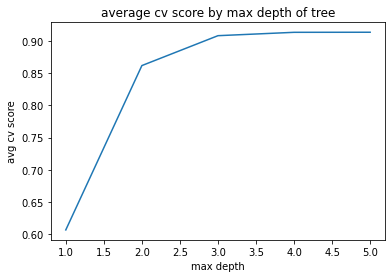

In [36]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = []
for i in range(1,6):
    clf = DecisionTreeClassifier(max_depth=i)
    n_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    scores.append(n_scores.mean())

plt.plot(range(1,6), scores)
plt.title('average cv score by max depth of tree')
plt.ylabel('avg cv score')
plt.xlabel('max depth')
plt.show()

In [9]:
clf2 = DecisionTreeClassifier(random_state=0)
path = clf2.cost_complexity_pruning_path(X_train, y_train)
path.ccp_alphas
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas

array([0.        , 0.11890244, 0.26945353])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

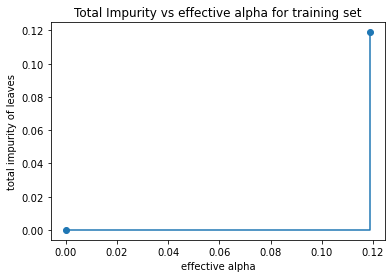

In [10]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [11]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    

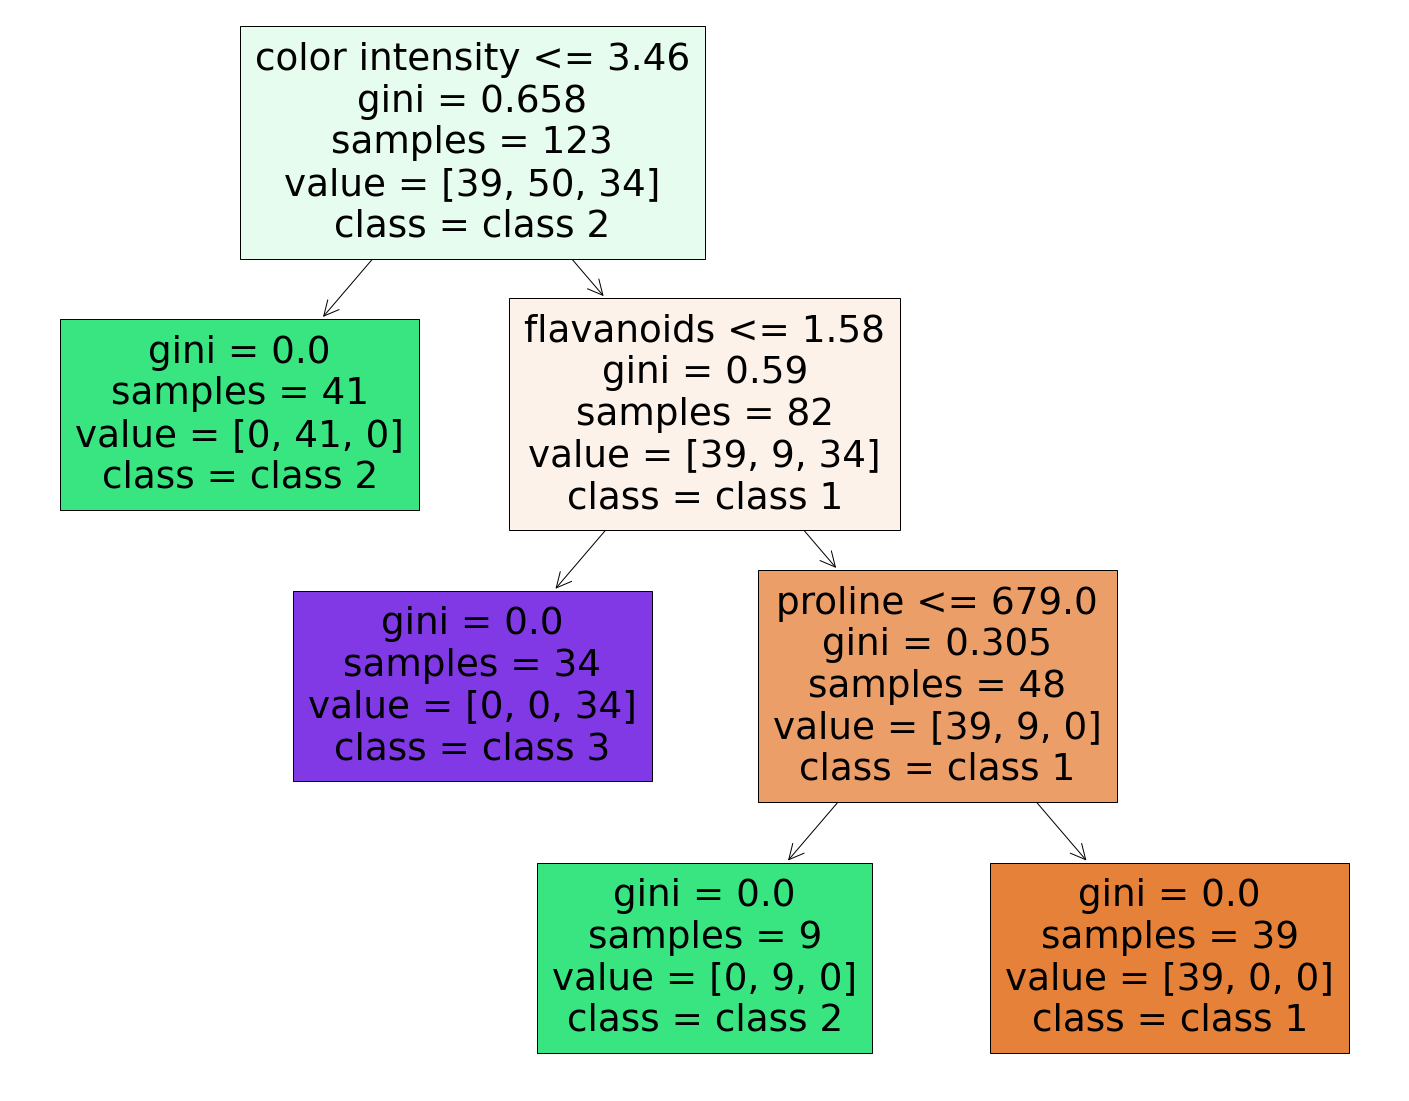

In [12]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clfs[0], 
                  feature_names=columns[1:],
                  class_names=["class 1", "class 2", "class 3"],
                  filled=True)

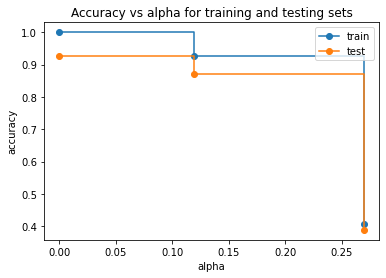

In [13]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

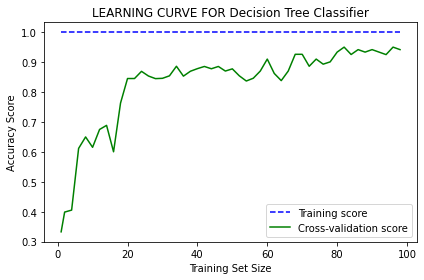

In [28]:
clf = DecisionTreeClassifier()
sizes, training_scores, testing_scores = learning_curve(clf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Decision Tree Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

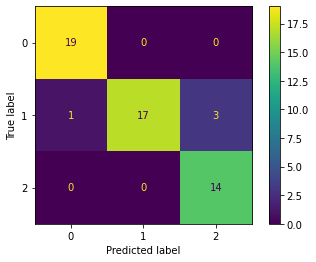

In [35]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [15]:
# ADABoost classifier
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(n_scores.mean(), n_scores.std())

0.8984656084656085 0.05184548065813875


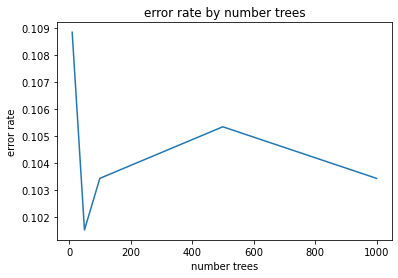

In [17]:
n_trees = [10, 50, 100, 500, 1000]
cv_scores = []
for n in n_trees:
    model = AdaBoostClassifier(n_estimators=n)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    cv_scores.append(1 - n_scores.mean())

plt.plot(n_trees, cv_scores)
plt.title('error rate by number trees')
plt.ylabel('error rate')
plt.xlabel('number trees')
plt.show()

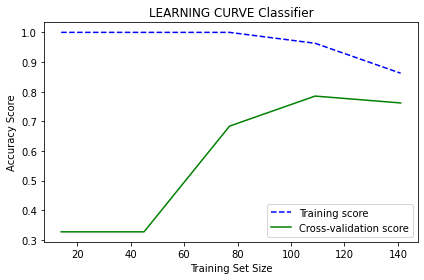

In [18]:
def plot_learning_curve(estimator, X, y, cv=5):
    
    sizes, training_scores, testing_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy')

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)

    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)

    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    # Drawing plot
    plt.title("LEARNING CURVE Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
model = AdaBoostClassifier(n_estimators=50)
plot_learning_curve(model, X, y)

In [21]:
def build_classifier(optimizer='adam', learn_rate=0.001, momentum=0):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 13, activation = 'relu', input_dim = 13))

    classifier.add(Dense(units = 10, activation = 'relu'))

    classifier.add(Dense(3, activation = 'softmax'))
#     optimizer = RMSprop(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

model = KerasClassifier(build_fn=build_classifier, verbose=0)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


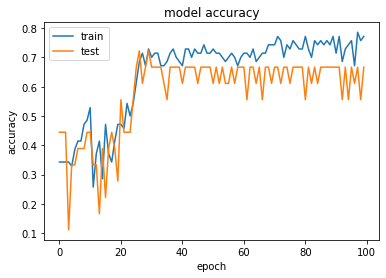

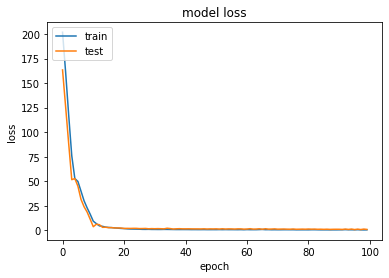

In [91]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
model.score(X_test, y_test)

0.83146065

In [93]:
model = KerasClassifier(build_fn=build_classifier, verbose=0)
# grid search epochs, batch size
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.783660 using {'batch_size': 10, 'epochs': 100}
0.365359 (0.123949) with: {'batch_size': 10, 'epochs': 10}
0.658170 (0.055559) with: {'batch_size': 10, 'epochs': 50}
0.783660 (0.142843) with: {'batch_size': 10, 'epochs': 100}
0.445752 (0.119245) with: {'batch_size': 20, 'epochs': 10}
0.577124 (0.126426) with: {'batch_size': 20, 'epochs': 50}
0.680392 (0.083507) with: {'batch_size': 20, 'epochs': 100}
0.306536 (0.116009) with: {'batch_size': 40, 'epochs': 10}
0.598039 (0.210311) with: {'batch_size': 40, 'epochs': 50}
0.680392 (0.081697) with: {'batch_size': 40, 'epochs': 100}
0.429412 (0.108733) with: {'batch_size': 60, 'epochs': 10}
0.599346 (0.128071) with: {'batch_size': 60, 'epochs': 50}
0.657516 (0.123776) with: {'batch_size': 60, 'epochs': 100}
0.271242 (0.060045) with: {'batch_size': 80, 'epochs': 10}
0.442484 (0.198650) with: {'batch_size': 80, 'epochs': 50}
0.567320 (0.136984) with: {'batch_size': 80, 'epochs': 100}
0.294771 (0.127181) with: {'batch_size': 100, 'epochs':

In [76]:
model = KerasClassifier(build_fn=build_classifier, verbose=0, epochs=100, batch_size=10)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X.to_numpy(), y.to_numpy())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.825238 using {'optimizer': 'RMSprop'}
0.077778 (0.155556) with: {'optimizer': 'SGD'}
0.825238 (0.142010) with: {'optimizer': 'RMSprop'}
0.435556 (0.249663) with: {'optimizer': 'Adagrad'}
0.274286 (0.390332) with: {'optimizer': 'Adadelta'}
0.762064 (0.118745) with: {'optimizer': 'Adam'}
0.534603 (0.269328) with: {'optimizer': 'Adamax'}
0.530159 (0.297879) with: {'optimizer': 'Nadam'}


In [23]:
# Normalize input data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


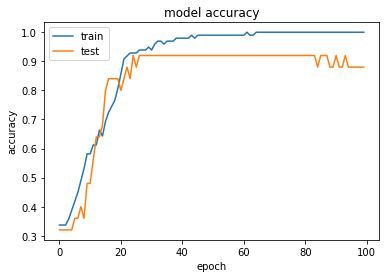

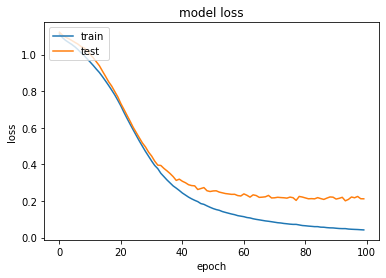

0.962963

In [25]:
model = KerasClassifier(build_fn=build_classifier, verbose=0)
# Fit the model
history = model.fit(X_train_norm, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.score(X_test_norm, y_test)

In [47]:
# testing epochs/batches with normalized input
model = KerasClassifier(build_fn=build_classifier, verbose=0)
# grid search epochs, batch size
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_norm, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975667 using {'batch_size': 10, 'epochs': 100}
0.642667 (0.125727) with: {'batch_size': 10, 'epochs': 10}
0.951333 (0.039064) with: {'batch_size': 10, 'epochs': 50}
0.975667 (0.019877) with: {'batch_size': 10, 'epochs': 100}
0.619333 (0.127978) with: {'batch_size': 20, 'epochs': 10}
0.886667 (0.108136) with: {'batch_size': 20, 'epochs': 50}
0.951000 (0.030580) with: {'batch_size': 20, 'epochs': 100}
0.536667 (0.127611) with: {'batch_size': 40, 'epochs': 10}
0.770000 (0.146029) with: {'batch_size': 40, 'epochs': 50}
0.958667 (0.037274) with: {'batch_size': 40, 'epochs': 100}
0.407000 (0.215165) with: {'batch_size': 60, 'epochs': 10}
0.729667 (0.258161) with: {'batch_size': 60, 'epochs': 50}
0.911000 (0.038667) with: {'batch_size': 60, 'epochs': 100}
0.373000 (0.074135) with: {'batch_size': 80, 'epochs': 10}
0.773000 (0.090298) with: {'batch_size': 80, 'epochs': 50}
0.903333 (0.053572) with: {'batch_size': 80, 'epochs': 100}
0.424000 (0.128277) with: {'batch_size': 100, 'epochs':

In [48]:
model = KerasClassifier(build_fn=build_classifier, verbose=0, epochs=100, batch_size=10)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_norm, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.983667 using {'optimizer': 'RMSprop'}
0.934333 (0.056486) with: {'optimizer': 'SGD'}
0.983667 (0.020011) with: {'optimizer': 'RMSprop'}
0.374000 (0.080399) with: {'optimizer': 'Adagrad'}
0.373000 (0.167021) with: {'optimizer': 'Adadelta'}
0.983333 (0.033333) with: {'optimizer': 'Adam'}
0.877333 (0.077707) with: {'optimizer': 'Adamax'}
0.967000 (0.031098) with: {'optimizer': 'Nadam'}


In [50]:
def build_classifier(learn_rate=0.001, momentum=0):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 13, activation = 'relu', input_dim = 13))

    classifier.add(Dense(units = 10, activation = 'relu'))

    classifier.add(Dense(3, activation = 'softmax'))
    optimizer = RMSprop(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
model = KerasClassifier(build_fn=build_classifier, verbose=0, epochs=100, batch_size=10)
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_norm, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.983333 using {'learn_rate': 0.001, 'momentum': 0.4}
0.967333 (0.031013) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.975333 (0.020149) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.983333 (0.033333) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.975333 (0.020149) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.983333 (0.020412) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.975333 (0.020149) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.966667 (0.040825) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.983333 (0.020412) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.975333 (0.020149) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.975000 (0.033333) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.983333 (0.020412) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.975333 (0.020149) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.715667 (0.222490) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.559000 (0.224597) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.575000 (0.306188) with: {'learn_rate':

In [51]:
# Now try with optimum hyperparameters
def build_classifier(learn_rate=0.001, momentum=0):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 13, activation = 'relu', input_dim = 13))

    classifier.add(Dense(units = 10, activation = 'relu'))

    classifier.add(Dense(3, activation = 'softmax'))
    optimizer = RMSprop(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

model = KerasClassifier(build_fn=build_classifier, verbose=0, epochs=100, batch_size=10, learn_rate=0.001,
                       momentum=0.4)
model.fit(X_train_norm, y_train)

In [52]:
model.score(X_test_norm, y_test)

0.962963

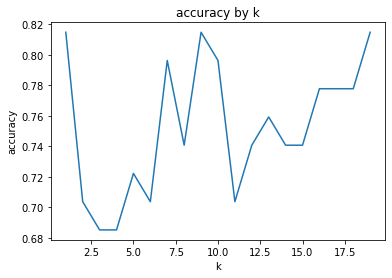

In [69]:
# K-NN uniform weights
scores=[]
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(range(1,20), scores)
plt.title('accuracy by k')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()

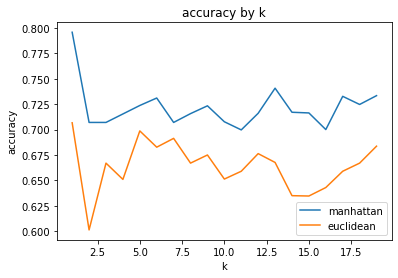

In [100]:
# K-NN uniform weights
m_scores=[]
e_scores=[]
min_scores=[]
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    m_scores.append(cross_val_score(knn, X_train, y_train, cv=5).mean())
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    e_scores.append(cross_val_score(knn, X_train, y_train, cv=5).mean())

plt.plot(range(1,20), m_scores)
plt.plot(range(1,20), e_scores)
plt.title('accuracy by k')
plt.legend(['manhattan', 'euclidean'], loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()

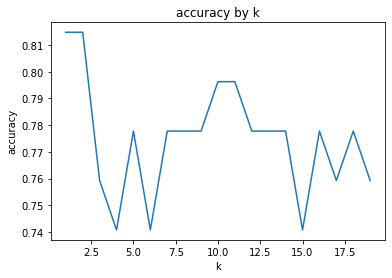

In [60]:
# K-NN weight points by inverse of distance
scores=[]
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(range(1,20), scores)
plt.title('accuracy by k')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()

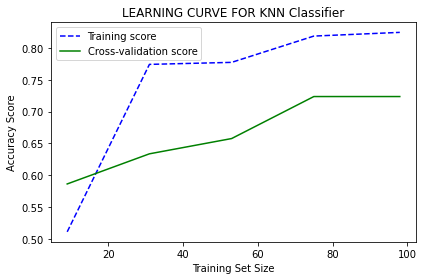

In [117]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
def plot_learning_curve(estimator, X, y, cv=5):
    
    sizes, training_scores, testing_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy')

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)

    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)

    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    # Drawing plot
    plt.title("LEARNING CURVE FOR KNN Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

plot_learning_curve(knn, X_train, y_train, 5)

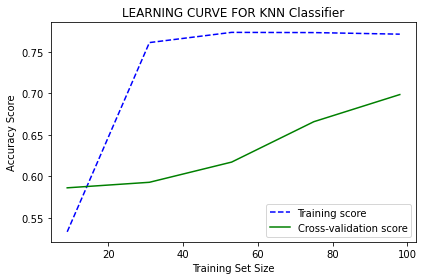

In [108]:
knn = KNeighborsClassifier()
plot_learning_curve(knn, X_train, y_train, 5)
